# Implementation of Polnomial Regresion 

In [1]:
#Required imports for the algorithm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as linalg

# Reading in data
data = pd.read_csv('Task1 - dataset - pol_regression.csv')
data

Unnamed: 0      int64
x             float64
y             float64
dtype: object

In [2]:
# Seperating x and y value from the data set
x_train = data['x']
y_train = data['y']

In [3]:
#Expands regression according to the size of the degree
def feature_expansion(features_train,degree):
    # Creates a matrix of features with the degrees applied
    X = np.ones(features_train.shape)
    for i in range(1,degree + 1):
        X = np.column_stack((X, features_train ** i))
    return X

In [4]:
def pol_regression(features_train, y_train, degree):
   
    # Least Sqaures to find weights
    if degree != 0:
        parameters = feature_expansion(features_train,degree)
        tmp = parameters.transpose().dot(parameters)
        polynomial_coefficients = np.linalg.solve(tmp,parameters.transpose().dot(y_train))
        
    else:
        #Returns the constant when the degree is 0
        degree = 1 
        parameters = feature_expansion(features_train,degree)
        tmp = parameters.transpose().dot(parameters)
        polynomial_coefficients = np.linalg.solve(tmp,parameters.transpose().dot(y_train))
        polynomial_coefficients = np.delete(polynomial_coefficients,1)
    return polynomial_coefficients

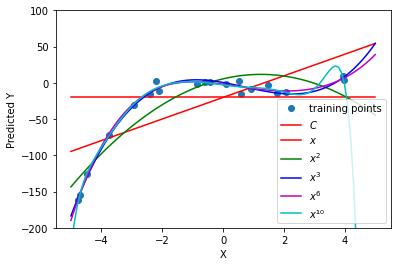

In [5]:
plt.figure()
plt.plot(x_train,y_train, 'o')

x_range = np.linspace(-5,5,100) 

weights = pol_regression(x_train, y_train, 0)
X = feature_expansion(x_range,0)
y_predict = X*weights
plt.plot(x_range, y_predict, 'r')


weights = pol_regression(x_train, y_train, 1)
X = feature_expansion(x_range,1)
y_predict = X.dot(weights)
plt.plot(x_range, y_predict, 'r')

weights = pol_regression(x_train, y_train, 2)
X = feature_expansion(x_range,2)
y_predict = X.dot(weights)
plt.plot(x_range, y_predict, 'g')

weights = pol_regression(x_train, y_train, 3)
X = feature_expansion(x_range,3)
y_predict = X.dot(weights)
plt.plot(x_range, y_predict, 'b')

weights = pol_regression(x_train, y_train, 6)
X = feature_expansion(x_range,6)
y_predict = X.dot(weights)
plt.plot(x_range, y_predict, 'm')

weights = pol_regression(x_train, y_train, 10)
X = feature_expansion(x_range,10)
y_predict = X.dot(weights)
plt.plot(x_range, y_predict, 'c')

plt.ylim((-200, 100))

plt.xlabel('X')
plt.ylabel('Predicted Y')
plt.legend(('training points', '$C$', '$x$', '$x^2$', '$x^3$', '$x^6$', '$x¹⁰$'), loc = 4)

# Evaluation


In [6]:
#Evaluation split 
shuf = data.sample(frac=1)

train_size = int(0.7 * len(data))

data_train = shuf[:train_size]
data_test = shuf[train_size:]

X_train = data_train['x']
Y_train = data_train['y']

X_test = data_test['x']
Y_test = data_test['y']

print(Y_train,'\n\n',Y_train,'\n\n',X_test,'\n\n',Y_test)

0       2.238321
9       1.586948
19     -2.259106
7     -29.934683
16   -162.084241
12     -3.133557
10   -155.192926
14    -13.629526
11      0.737940
15     -7.818825
5       3.237086
3      -1.580098
13      2.772584
1     -13.104269
Name: y, dtype: float64 

 0       2.238321
9       1.586948
19     -2.259106
7     -29.934683
16   -162.084241
12     -3.133557
10   -155.192926
14    -13.629526
11      0.737940
15     -7.818825
5       3.237086
3      -1.580098
13      2.772584
1     -13.104269
Name: y, dtype: float64 

 18   -2.407476
17    0.588541
4     3.929470
2    -2.090953
8    -4.485328
6    -3.744147
Name: x, dtype: float64 

 18    -15.690391
17    -15.192640
4       9.174928
2     -10.895881
8    -125.275943
6     -72.556875
Name: y, dtype: float64


In [7]:
def eval_pol_regression(parameters, x, y, degree):
    #Caculating the predicted y
    X = feature_expansion(x,degree)
    #Condition for when degree equals 0
    if degree != 0:
        y_predict = X.dot(parameters)
    else:
        y_predict = X*parameters
    
    # Calculates the error to find the Sum of Squared Error 
    err = y - y_predict
    SSE = err.dot(err)
    #Divides by the length of the x values to find the average
    MSE = SSE/len(x)
    #Roots the Mean sqaured error to find the RMSE
    RMSE = np.sqrt(MSE)
    return RMSE

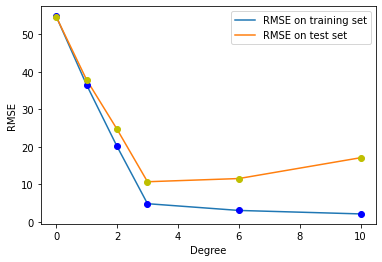

In [8]:
train_0 = eval_pol_regression(pol_regression(X_train,Y_train,0), X_train, Y_train,0)
test_0 = eval_pol_regression(pol_regression(X_test, Y_test,0), X_train, Y_train,0)

train_1 = eval_pol_regression(pol_regression(X_train,Y_train,1), X_train, Y_train,1)
test_1 = eval_pol_regression(pol_regression(X_test, Y_test,1), X_train, Y_train,1)

train_2 = eval_pol_regression(pol_regression(X_train,Y_train,2), X_train, Y_train,2)
test_2 = eval_pol_regression(pol_regression(X_test, Y_test,2), X_train, Y_train,2)

train_3 = eval_pol_regression(pol_regression(X_train,Y_train,3), X_train, Y_train,3)
test_3 = eval_pol_regression(pol_regression(X_test, Y_test,3), X_train, Y_train,3)

train_6 = eval_pol_regression(pol_regression(X_train,Y_train,6), X_train, Y_train,6)
test_6 = eval_pol_regression(pol_regression(X_test, Y_test,6), X_train, Y_train,6)

train_10 = eval_pol_regression(pol_regression(X_train,Y_train,10), X_train, Y_train,10)
test_10 = eval_pol_regression(pol_regression(X_test, Y_test,10), X_train, Y_train,10)

degree_plot = [0,1,2,3,6,10]
train_RMSE = train_0,train_1,train_2,train_3,train_6,train_10
test_RMSE = test_0,test_1,test_2,test_3,test_6,test_10
plt.plot(degree_plot,train_RMSE)
plt.plot(degree_plot,test_RMSE)

plt.plot(0,train_0,'bo')
plt.plot(0,test_0,'yo')
plt.plot(1,train_1,'bo')
plt.plot(1,test_1,'yo')
plt.plot(2,train_2,'bo')
plt.plot(2,test_2,'yo')
plt.plot(3,train_3,'bo')
plt.plot(3,test_3,'yo')
plt.plot(6,train_6,'bo')
plt.plot(6,test_6,'yo')
plt.plot(10,train_10,'bo')
plt.plot(10,test_10,'yo')

plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend(('RMSE on training set', 'RMSE on test set'))
plt.savefig('RMSE_comparison_2.png')


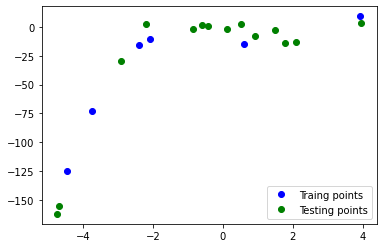

In [9]:

plt.plot(X_test, Y_test,'bo')
plt.plot(X_train, Y_train,'go')
plt.legend(('Traing points','Testing points'))
plt.savefig('test_train.png')
